# Model Evaluation

## 1.1 Review: R2
- Coefficient of determination
- Percentage of variation in y that the model captures
- Ranges from 0 to 1 (higher is better)
- LinearRegression().score()
- Limitations:
    - May not accurately measure performance of complicated models
    - Assumes erros are Gaussian

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
linear = pd.DataFrame({
    'actual': [99,202,294,410,487],
    'predicted': [100, 200, 300, 400, 500]
})

linear

,actual,predicted
0,99,100
1,202,200
2,294,300
3,410,400
4,487,500


## 1.1.2 r2_score

In [4]:
from sklearn.metrics import r2_score

r2_score(linear['actual'], linear['predicted'])

0.9968073229712082

In [5]:
linear['sq_error'] = (linear['actual'] - linear['predicted']) ** 2
linear['sq_diss_mean'] = (linear['actual'] - linear['actual'].mean()) ** 2

linear.head()

,actual,predicted,sq_error,sq_diss_mean
0,99,100,1,39760.36
1,202,200,4,9292.96
2,294,300,36,19.36
3,410,400,100,12454.56
4,487,500,169,35569.96


In [7]:
# R^2 = (1 - u/v)
u = linear['sq_error'].sum()
v = linear['sq_diss_mean'].sum()
r2 = 1 - u/v
r2

0.9968073229712082

## 1.1.3 Review: MSE
- Mean Squared Error
- Takes the error between each predicted and actual value, squares it, then calculates the average(mean) error

In [14]:
from sklearn.metrics import mean_squared_error

mean_squared_error(linear['actual'], linear['predicted'])

62.0

In [9]:
mse = linear['sq_error'].mean()
mse

62.0

## 1.1.4 Review: MSE

In [10]:
from math import sqrt
sqrt(mse)

7.874007874011811

## 1.1.5 mean_absolute_error
- Average of the absolute value of the errors between predicted and actual values
- Less affected by individual large outiler errors
- Less efficient to compute on large datasets

In [11]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(linear['actual'], linear['predicted'])

6.4

In [12]:
abs(-10)

10

In [13]:
abs(linear['actual'] - linear['predicted']).mean()

6.4

# 1.2 Classification

In [15]:
classifier = pd.DataFrame({
    'actual': ['A', 'A', 'B', 'B', 'A'],
    'predicted': ['A', 'A', 'B', 'B', 'B']
})

classifier['correct'] = classifier['actual'] == classifier['predicted']

classifier

,actual,predicted,correct
0,A,A,True
1,A,A,True
2,B,B,True
3,B,B,True
4,A,B,False


## 1.2.1 accuracy_score
- model.score()
- Calculates percent of accurate predictions
- Easy to understand
- Can be skewed when classed are unbalanced

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(classifier['actual'], classifier['predicted'])

0.8

## 1.2.1 balanced_accuracy_score
- weighs accuracy proportionate to class balance

In [17]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(classifier['actual'], classifier['predicted'])

0.8333333333333333

In [18]:
from sklearn.metrics import confusion_matrix

confusion = pd.DataFrame(
    data = confusion_matrix(classifier['actual'], classifier['predicted']),
    columns = ['Actual A', 'Actual B'],
    index = ['Predicted A', 'Predicted B']
)

confusion


,Actual A,Actual B
Predicted A,2,1
Predicted B,0,2


## 1.2.4 precision_score
- Precision measures how well the classifier predicts a given class (out of all the predicitons that class, what % were true?)
- True positives / (true positives + false positives)

In [21]:
from sklearn.metrics import precision_score

precision = precision_score(classifier['actual'], classifier['predicted'], pos_label = 'B')

precision

0.6666666666666666

## 1.2.5 recall_score
- Recall measures how well the classifier identifies all instances of a given class
- True positives / (true positives + false negatives)

In [22]:
from sklearn.metrics import recall_score

recall = recall_score(classifier['actual'], classifier['predicted'], pos_label = 'B')

recall

1.0

## 1.2.6 f1_score
- Combines precision and recall into a single metric
- Attempts to evenly balance precision ad recall

In [23]:
from sklearn.metrics import f1_score

f1_score(classifier['actual'], classifier['predicted'], pos_label = 'B')

0.8

In [24]:
2 * (precision * recall) / (precision + recall)

0.8

# 2 Random Forest Classifiers
- "Ensemble" algorithm (uses multiple decision trees)
- Randomly resamples the dataset multiple times ("bootstrapping") and generates a decision tree from each sample
- Uses only a random subset of columns at each step in the decision tree to separate the data
- Runs new observations down each tree and tallies the outcomes ("voting")
- Chooses algorithm based on the decision trees with the most aggregate votes ("bagging")
- Pros:
-Versatile and easy to implement
-Can be trained on small datasets
-Can handle high dimensionality
-Can handle null values
-Competitive performance
-No need for a test set
- Cons:
-Large forests are computationally expensive
-Very little control over model
-Better at classification than regression
https://youtu.be/J4Wdy0Wc_xQ?t=64

In [25]:
pd.DataFrame({
    'chest_pain': [ False, True, True, True],
    'good_circulation': [ False, True, True, False],
    'blocked_arteries': [False, True, False, True],
    'weight': [125, 180, 210, 167],
    'heart_disease': [False, True, False, True]
})

,chest_pain,good_circulation,blocked_arteries,weight,heart_disease
0,False,False,False,125,False
1,True,True,True,180,True
2,True,True,False,210,False
3,True,False,True,167,True


In [26]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    pd.get_dummies(titanic[['sex', 'class', 'who', 'deck', 'alone']]),
    titanic['survived'],
    test_size = .2,
    random_state = 42
)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100).fit(train_X, train_y)

predicitions = rf.predict(test_X)
predicitions

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [31]:
rf.score(test_X, test_y)

0.7988826815642458

In [32]:
pred_proba_y = rf.predict_proba(test_X)
pred_proba_y[:5]

array([[0.91509027, 0.08490973],
       [0.91156701, 0.08843299],
       [0.86847977, 0.13152023],
       [0.        , 1.        ],
       [0.57964961, 0.42035039]])

# 2.0.1 roc_curve()
- Receiver Operating Characteristic (ROC)
- Used to visualize the confidence threshold the model uses to make a given class prediction
- Only works with binary classifiers!!!!!!

In [34]:
pred_proba_y[:,1] # this returns all values from column 1, which is if they survived 

array([0.08490973, 0.08843299, 0.13152023, 1.        , 0.42035039,
       1.        , 0.57453014, 0.08490973, 0.57453014, 1.        ,
       0.19121126, 0.13152023, 0.38083088, 0.13152023, 0.08843299,
       1.        , 0.42764286, 0.57453014, 0.08843299, 0.47644835,
       0.13152023, 0.12338386, 0.38083088, 0.13152023, 0.13152023,
       0.30415859, 0.12338386, 0.08843299, 0.30415859, 0.57453014,
       0.13152023, 0.57453014, 0.12338386, 0.57453014, 0.13152023,
       0.08490973, 0.25047461, 0.57453014, 1.        , 0.13152023,
       0.04730526, 0.08490973, 0.13152023, 0.13152023, 0.38083088,
       0.08490973, 0.13152023, 0.13152023, 0.13152023, 0.42764286,
       0.42035039, 1.        , 0.08490973, 0.90095066, 0.13152023,
       1.        , 0.08843299, 1.        , 0.95567889, 0.57453014,
       0.13152023, 1.        , 0.96098569, 0.12338386, 0.13152023,
       0.99844737, 0.08843299, 0.13152023, 0.08490973, 1.        ,
       0.96098569, 1.        , 0.47644835, 1.        , 0.13152

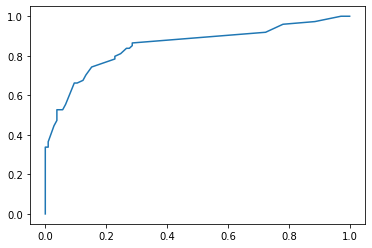

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(test_y, pred_proba_y[:,1])

plt.plot(fpr, tpr)

# roc_auc_score(y_true, y_scores)

## 2.0.2 roc_auc_score()
- Computes % of area under ROC curve(0 to 1)

In [35]:
auc = roc_auc_score(test_y, pred_proba_y[:,1])
auc

0.8512226512226512